# Mounting Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data loading from keras

In [0]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Re-shaping Train and Test data

In [0]:
x_train = x_train.reshape(-1,28,28,1)

In [0]:
x_test = x_test.reshape(-1,28,28,1)

# Visualizing data

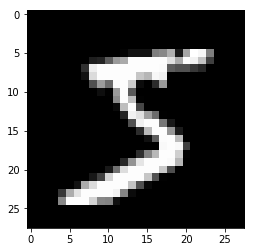

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(x_train[0][:,:,0], cmap='gray')

In [0]:
y_train[0]

5

# Pre-processing using Image Data Generator

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data1 = ImageDataGenerator(rescale=1./255)

test_data1 = ImageDataGenerator(rescale=1./255)



# Creating a CNN Model

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

img_input = layers.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)

output = layers.Dense( 10, activation='softmax')(x)

model = Model(img_input, output)
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 128)         0   

##Compling the created model

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(
                  lr=0.001, 
                  epsilon=None, 
                  decay=0.01),
              metrics=['acc'])

## Checking the accuracy

In [0]:
history = model.fit_generator(train_data1.flow(x_train,y_train, batch_size=400),
                              epochs = 30, validation_data = test_data1.flow(x_test,y_test,batch_size=100),
                              verbose = 2, steps_per_epoch=100,validation_steps=50)

Epoch 1/30
100/100 - 4s - loss: 0.5769 - acc: 0.8153 - val_loss: 1.4727 - val_acc: 0.9464
Epoch 2/30
100/100 - 3s - loss: 0.1528 - acc: 0.9577 - val_loss: 1.3742 - val_acc: 0.9702
Epoch 3/30
100/100 - 3s - loss: 0.1111 - acc: 0.9689 - val_loss: 1.3772 - val_acc: 0.9746
Epoch 4/30
100/100 - 3s - loss: 0.0850 - acc: 0.9771 - val_loss: 1.3124 - val_acc: 0.9790
Epoch 5/30
100/100 - 3s - loss: 0.0784 - acc: 0.9786 - val_loss: 1.3020 - val_acc: 0.9800
Epoch 6/30
100/100 - 3s - loss: 0.0702 - acc: 0.9808 - val_loss: 1.2604 - val_acc: 0.9802
Epoch 7/30
100/100 - 3s - loss: 0.0562 - acc: 0.9848 - val_loss: 1.2268 - val_acc: 0.9806
Epoch 8/30
100/100 - 3s - loss: 0.0537 - acc: 0.9854 - val_loss: 1.2011 - val_acc: 0.9808
Epoch 9/30
100/100 - 3s - loss: 0.0538 - acc: 0.9850 - val_loss: 1.2117 - val_acc: 0.9798
Epoch 10/30
100/100 - 3s - loss: 0.0469 - acc: 0.9876 - val_loss: 1.1840 - val_acc: 0.9844
Epoch 11/30
100/100 - 3s - loss: 0.0437 - acc: 0.9883 - val_loss: 1.1713 - val_acc: 0.9820
Epoch 12

##Saving the trained model, along with weights

In [0]:
model.save("Digit.h5")
model.save_weights("digit_wt.h5")

# Loading the saved model

In [0]:
import tensorflow
model_trained= tensorflow.keras.models.load_model("Digit.h5")

In [0]:
model_trained.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 128)         0   

# Loading Kaggle dataset from drive

In [0]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/DATASETS/digit-recognizer.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import pandas as pd
train_df= pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [0]:
Y_train= train_df['label']

In [0]:
X_train= train_df.drop(labels='label',axis=1)

#Reshaping train & test data

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
test_df = test_df.values.reshape(-1,28,28,1)

In [0]:
Y_train

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

# Visualzing data

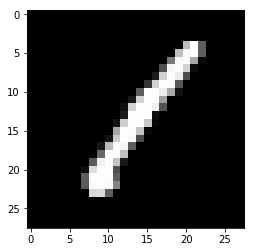

In [0]:
plt.imshow(X_train[0][:,:,0],cmap='gray')

# Preprocessing data using Image Data Generator

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data2 = ImageDataGenerator(rescale=1./255)
test_data2 = ImageDataGenerator(rescale=1./255)

# Checking accuracy

In [0]:
history = model_trained.fit_generator(train_data2.flow(X_train,Y_train, batch_size=250),
                              epochs = 50, validation_data = test_data1.flow(x_test,y_test,batch_size=50),
                              verbose = 2, steps_per_epoch=100,validation_steps=50)

Epoch 1/50
100/100 - 2s - loss: 0.0323 - acc: 0.9918 - val_loss: 0.0305 - val_acc: 0.9896
Epoch 2/50
100/100 - 2s - loss: 0.0272 - acc: 0.9928 - val_loss: 0.0291 - val_acc: 0.9904
Epoch 3/50
100/100 - 2s - loss: 0.0282 - acc: 0.9928 - val_loss: 0.0309 - val_acc: 0.9900
Epoch 4/50
100/100 - 2s - loss: 0.0270 - acc: 0.9928 - val_loss: 0.0295 - val_acc: 0.9908
Epoch 5/50
100/100 - 2s - loss: 0.0282 - acc: 0.9924 - val_loss: 0.0304 - val_acc: 0.9892
Epoch 6/50
100/100 - 2s - loss: 0.0263 - acc: 0.9934 - val_loss: 0.0287 - val_acc: 0.9904
Epoch 7/50
100/100 - 2s - loss: 0.0276 - acc: 0.9926 - val_loss: 0.0278 - val_acc: 0.9900
Epoch 8/50
100/100 - 2s - loss: 0.0251 - acc: 0.9931 - val_loss: 0.0304 - val_acc: 0.9892
Epoch 9/50
100/100 - 2s - loss: 0.0255 - acc: 0.9932 - val_loss: 0.0281 - val_acc: 0.9908
Epoch 10/50
100/100 - 2s - loss: 0.0226 - acc: 0.9940 - val_loss: 0.0287 - val_acc: 0.9912
Epoch 11/50
100/100 - 2s - loss: 0.0256 - acc: 0.9932 - val_loss: 0.0296 - val_acc: 0.9900
Epoch 12

#Plotting Train & Test Accuracy

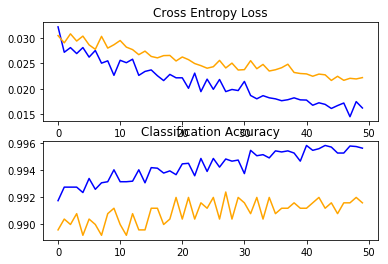

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()

##Saving the final model

In [0]:
model_trained.save("Digit1.h5")

In [0]:
model_trained1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0   

# Creating File for Kaggle Submission

In [0]:
import numpy as np
results = model_trained.predict(test_df)

results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("mnist_digit2.csv",index=False)